In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [3]:
data = pd.read_csv("rainfall_in_india_1901-2015.csv",sep=",")
data = data.fillna(data.mean())
division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

In [4]:
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)

In [6]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)


In [7]:
#terst 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)


In [8]:
from sklearn.svm import SVR

# SVM model
reg = SVR(gamma='auto', C=0.1, epsilon=0.2)
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

127.1600615632603


MEAN 2005
121.2111111111111 82.37838149669057
Standard deviation 2005
123.77066107608005 0.10154600935364391
MEAN 2010
139.93333333333334 81.95950058417766
Standard deviation 2010
135.71320250194282 0.8672445700490311
MEAN 2015
88.52222222222223 82.34592292482981
Standard deviation 2015
86.62446123324875 0.13020499474697297


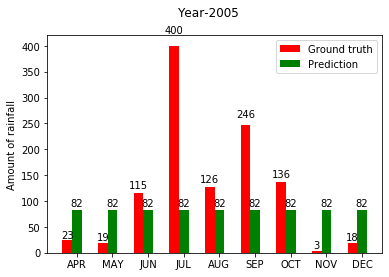

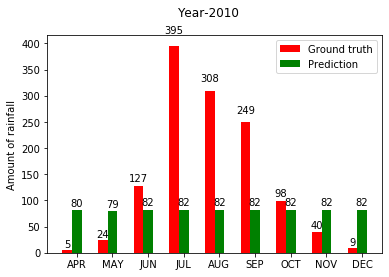

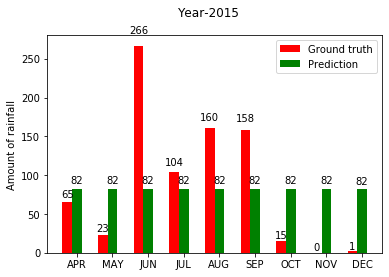

In [9]:

#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print ("MEAN SQUARED ERROR =",mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED ERROR =",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MEAN ABSOLUTE ERROR =",mean_absolute_error(y_test, y_pred))
print("r2_score =",r2_score(y_test, y_pred))

MEAN SQUARED ERROR = 41470.84706342684
ROOT MEAN SQUARED ERROR = 203.64392223542256
MEAN ABSOLUTE ERROR = 127.1600615632603
r2_score = -0.12437112975400688
